We will see what standard classical force field energy functions look like.  Overall, the energy of classical system is typically given as: <br>

$ U(R^N) = \sum_{i=1,n_{bonds}} 0.5k_i(x-x_{0,i})^2 + \sum_{j=1,n_{angles}} 0.5k_j(\theta-\theta_{0,j})^2 + \sum_{l=1,n_{dihedrals}} k_l(1-\cos(n_l\phi-\delta_l)) + \sum_{i,j>i}\left[ 4\epsilon_{i,j}\left(\frac{\sigma_{i,j}^{12}}{r_{i,j}^{12}}-\frac{\sigma_{i,j}^{6}}{r_{i,j}^{6}}\right) + \frac{q_iq_j}{4\pi\epsilon_0}\right]$

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML
%matplotlib inline
#matplotlib.rcParams['animation.writer'] = 'avconv'

# Bonded Interactions

Bonded interactions are composed of energy terms to describe bonds, angles and dihedrals.  These typically have different functional forms.

## Bonds

Bonds are described as simple harmonic potentials: $U(x) = 0.5k(x-x_{0})^2$

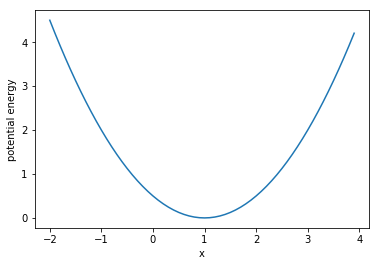

In [38]:
x0 = 1.0
k = 1.0
x = np.arange(-2,4,0.1)
fig, ax = plt.subplots()
ax.set_xlabel("x")
ax.set_ylabel("potential energy")
ax.plot(x,0.5*k*(x-x0)**2)

Angles are also described with a harmonic potential: $U(\theta) = 0.5k(\theta-\theta_{0})^2$

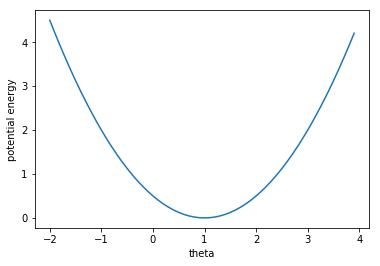

In [39]:
theta0 = 1.0
k = 1.0
x = np.arange(-2,4,0.1)
fig, ax = plt.subplots()
ax.set_xlabel(r'theta')
ax.set_ylabel("potential energy")
ax.plot(x,0.5*k*(x-x0)**2)

Dihedral functions are a bit strange because they need to have multiple minima and be periodic.  Their functional form typically looks something like: $U(\phi) = k(1-\cos(n\phi-\delta))$

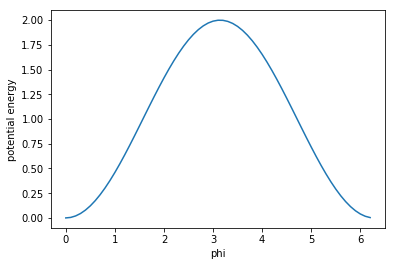

In [5]:
k = 1.0
n = 1
delta = 0.0
pi = 3.1415926535
x = np.arange(0,2*pi,0.1)
fig, ax = plt.subplots()
ax.set_xlabel(r'phi')
ax.set_ylabel("potential energy")
ax.plot(x,k*(1-np.cos(n*x-delta)))

# Non-bonded interactions

Non-bonded interactions are composed of two terms: Lennard-Jones and Coulomb.  The Lennard-Jones term attempts to capture dispersion and excluded volume interactions while the Coulomb term is designed to capture charge-charge interactions. 

## Coulomb

The Coulomb potential is: $U(r_{i,j}) = \frac{q_iq_j}{4\pi\epsilon_0r_{i,j}}$, where $r_{i,j}$ is the distance between particles $i$ and $j$, $q_i$ is the charge on particle $i$, $q_j$ is the charge on particle $j$ and $\epsilon_0$ ($\epsilon_0 = 8.85418782 \times 10^{-12} m^{-3} kg^{-1} s^{4} A^{2}$) is the permittivity of free space.

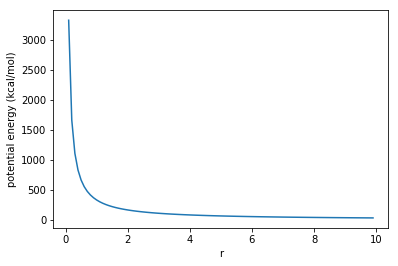

In [41]:
q1 = 1 # in electron charge due to constant given below
q2 = 1
const = 18.2223**2
x = np.arange(0.1,10,0.1)
fig, ax = plt.subplots()
ax.set_xlabel(r'r')
ax.set_ylabel("potential energy (kcal/mol)")
ax.plot(x,const*q1*q2/x)

## Lennard-Jones

Lennard-Jones is a 6-12 potential designed (with computational efficiency in mind) to capture dispersion and excluded volueme.  $U_{LJ}(r_{i,j}) =  4\epsilon_{i,j}\left[\left(\frac{\sigma_{i,j}}{r_{i,j}}\right)^{12}-\left(\frac{\sigma_{i,j}}{r_{i,j}}\right)^6\right]$

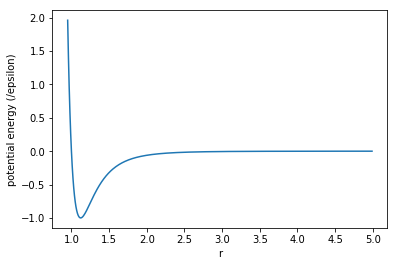

In [42]:
epsilon = 1 # in electron charge due to constant given below
sigma = 1
x = np.arange(0.95,5,0.01)
fig, ax = plt.subplots()
ax.set_xlabel(r'r')
ax.set_ylabel("potential energy (/epsilon)")
ax.plot(x,4*epsilon*( (sigma/x)**12 - (sigma/x)**6))